# World population distribution

This dataset contains the `population` for each world `region` from 1800 through 2100 (projected).

The four regions are defined by Gapminder.org. The regions are Africa, Asia, Europe, and the Americas.

This csv also contains global data (`region` is 'world') and other indicators including `life_expectancy`, `child_mortality` rates (per 1000), average number of `babies_per_woman`, and average `income_per_person` (in adjusted USD). See the README for details.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

indicators = pd.read_csv('world-indicators.csv')
indicators

,year,region,population,life_expectancy,child_mortality,babies_per_woman,income_per_person
0,1800,africa,81209567,30.091575,443.51,6.58,437.699298
1,1801,africa,81313551,30.016479,443.47,6.58,437.322912
2,1802,africa,81418900,30.019117,443.44,6.58,436.949999
3,1803,africa,81525621,30.099188,443.41,6.58,436.501460
4,1804,africa,81633731,30.101720,443.37,6.58,436.033849
...,...,...,...,...,...,...,...
1500,2096,world,10225850874,83.170480,12.00,1.81,43370.546400
1501,2097,world,10215549310,83.280416,11.00,1.81,43731.659780
1502,2098,world,10204489862,83.393080,11.00,1.80,44094.151440
1503,2099,world,10192689066,83.506378,11.00,1.80,44457.765070




#### Line Plot

- Create a line plot with year on the x-axis and population on y-axis for each `region`.

- We pivoted the dataframe for you in the variable `df_pivot`.

- Follow the Pro Tips for line plots.



In the `year` 2000, there were roughly 6 billion people on earth. If you had blocks that each represented 1 billion people, how many blocks would you predict belong in each `region` (africa, asia, europe, americas)?

In [2]:
# Select the year 2000
year_2000 = indicators.query('year == 2000')

# Group by region and display the average population
countries2000 = pd.DataFrame()
countries2000['population'] = year_2000.groupby('region')['population'].mean()
countries2000['block_number'] = countries2000['population'].astype(str).str[0].astype(int) # Get the first character, and convert into int
countries2000

,population,block_number
region,,
africa,8.293849e+08,8
americas,8.283649e+08,8
asia,3.695910e+09,3
europe,8.080671e+08,8
world,6.171703e+09,6


- In the `year` 2100, the UN projects 11 billion people. Again, predict how many blocks would now go to each `region`.

In [3]:
year_2100 = indicators.query('year == 2100')
countries2100 = pd.DataFrame()
countries2100['population'] = year_2100.groupby('region')['population'].mean()
countries2100['block_number'] = countries2100['population'].astype(str).str[0].astype(int)
countries2100

,population,block_number
region,,
africa,3.810822e+09,3
americas,1.085557e+09,1
asia,4.603160e+09,4
europe,6.721280e+08,6
world,1.018016e+10,1


- Test your predictions. First create a new column named `pop_billions` (`population` divided by 1e9 that is rounded to the nearest would number).
- Then filter on the years 2000 and 2100 to create your horizontal bar plots. 

- Follow the Pro Tips for horizontal bar plots.

Challenge: Place your plots side by side by using `plt.subplots(1,2)`.

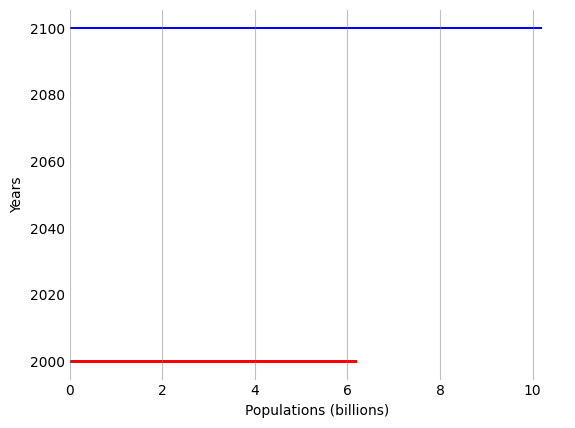

In [4]:
# Pop_billions
indicators['pop_billions'] = indicators.eval('population / 1e9').round(1)

# Filter on the years 2000 and 2100
indicators = indicators.query('year == 2000 or year == 2100')

# Horizontal bar plots
colors= ['red', 'blue']
plt.barh(indicators['year'], indicators['pop_billions'], color=colors)
plt.xlabel('Populations (billions)')
plt.ylabel('Years')
plt.grid(alpha=0.5, color='grey', axis='x')
ax = plt.gca()
ax.tick_params(axis='both', length=0)
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

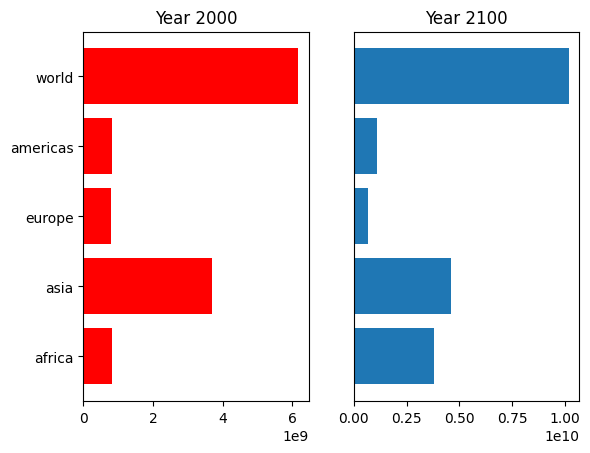

In [5]:
# The challenge : make subplots
year_2000

fig, axes = plt.subplots(1,2)
axes[0].barh(year_2000['region'], year_2000['population'], color='red')
axes[0].set_title('Year 2000')
axes[1].barh(year_2100['region'], year_2100['population'])
axes[1].set_title('Year 2100')
axes[1].set_yticklabels([])
axes[1].tick_params(axis='y', length=0)

- Create a line plot with year on the x-axis and population on y-axis for each `region`.

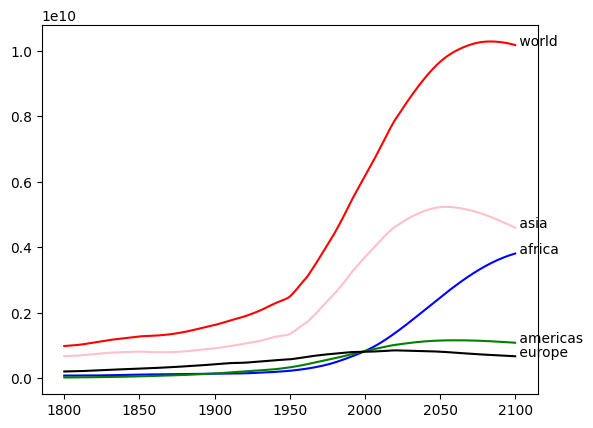

In [18]:
df = pd.read_csv('world-indicators.csv')

# See how many regions there are (5)
df['region'].unique().shape[0]

def popEvolution(query, color_set):
    """
    Create a Dataframe for one region, and its line plot
    """
    df2 = pd.DataFrame()
    df2 = df.query(f'region == "{query}"')
    plt.plot(df2['year'], df2['population'], color=color_set)

    # Add text at the end of each region's data
    # Find the last entry in their df
    last_year = df2['year'].iloc[-1]
    last_population = df2['population'].iloc[-1]

    # Add the text there
    plt.text(last_year, last_population, f" {query}")

# Display
popEvolution("world", 'red')
popEvolution("africa", 'blue')
popEvolution("americas", 'green')
popEvolution("asia", 'pink')
popEvolution("europe", 'black')

